# eda004

In [2]:
import os
import sys
from dotenv import load_dotenv
load_dotenv
sys.path.append(os.getenv('UTILS_PATH'))
import datetime
from dateutil.relativedelta import relativedelta
import pandas as pd
import matplotlib.pyplot as plt; plt.style.use("ggplot")
import seaborn as sns
from PIL import Image
from pathlib import Path

In [3]:
INPUT_DIR = os.getenv('INPUT_DIR')
OUTPUT_DIR = os.getenv('OUTPUT_DIR')

In [4]:
import builtins
import types

def imports():
    for name, val in globals().items():
        # module imports
        if isinstance(val, types.ModuleType):
            yield name, val

            # functions / callables
        if hasattr(val, '__call__'):
            yield name, val


def noglobal(f):
    '''
    ref: https://gist.github.com/raven38/4e4c3c7a179283c441f575d6e375510c
    '''
    return types.FunctionType(f.__code__,
                              dict(imports()),
                              f.__name__,
                              f.__defaults__,
                              f.__closure__
                              )

In [5]:
def show_images(article_ids, cols=1, rows=-1):
    if isinstance(article_ids, int) or isinstance(article_ids, str):
        article_ids = [article_ids]
    article_count = len(article_ids)
    if rows < 0: rows = (article_count // cols) + 1
    plt.figure(figsize=(3 + 3.5 * cols, 3 + 5 * rows))
    for i in range(article_count):
        article_id = ("0" + str(article_ids[i]))[-10:]
        plt.subplot(rows, cols, i + 1)
        plt.axis('off')
        plt.title(article_id)
        try:
            image = Image.open(INPUT_DIR + f"images/{article_id[:3]}/{article_id}.jpg")
            plt.imshow(image)
        except:
            pass

In [6]:
articles = pd.read_csv(INPUT_DIR + 'articles.csv', dtype='object')
customers = pd.read_csv(INPUT_DIR + 'customers.csv')
transactions = pd.read_csv(INPUT_DIR + 'transactions_train.csv', dtype={'article_id':'str'}, parse_dates=['t_dat'])
sample = pd.read_csv(INPUT_DIR + 'sample_submission.csv')

In [7]:
# 名寄せ
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].str.replace('None','NONE')
# transactionに紐づけ
transactions = transactions.merge(customers, on='customer_id', how='left')
transactions = transactions.merge(articles, on='article_id', how='left')

In [8]:
transactions.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id', 'FN',
       'Active', 'club_member_status', 'fashion_news_frequency', 'age',
       'postal_code', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [9]:
cols = ['sales_channel_id', 'FN',
       'Active', 'club_member_status', 'fashion_news_frequency', 'age',
       'postal_code', 'product_code', 'prod_name',
       'product_type_name', 'product_group_name',
       'graphical_appearance_name','colour_group_name',
       'perceived_colour_value_name',
       'perceived_colour_master_name',
       'department_name', 'index_name',
       'index_group_name', 'section_name',
       'garment_group_name']

Text(0.5, 1.0, 'sales_channel_id')

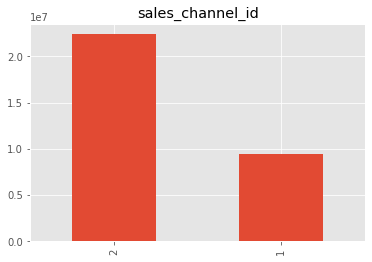

In [10]:
c = cols[0]
transactions[c].value_counts().plot(kind='bar')
plt.title(c)

Text(0.5, 1.0, 'club_member_status')

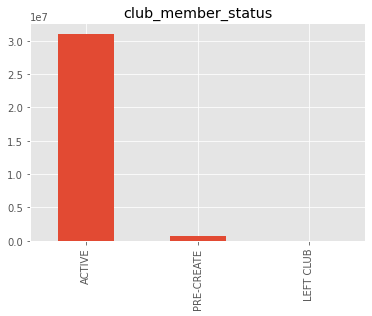

In [11]:
c = cols[3]
transactions[c].value_counts().plot(kind='bar')
plt.title(c)

Text(0.5, 1.0, 'fashion_news_frequency')

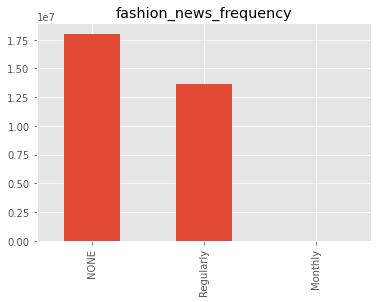

In [12]:
c = cols[4]
transactions[c].value_counts().plot(kind='bar')
plt.title(c)

In [14]:
transactions[cols].nunique()

sales_channel_id                     2
FN                                   1
Active                               1
club_member_status                   3
fashion_news_frequency               3
age                                 84
postal_code                     352336
product_code                     46834
prod_name                        45508
product_type_name                  130
product_group_name                  19
graphical_appearance_name           30
colour_group_name                   50
perceived_colour_value_name          8
perceived_colour_master_name        20
department_name                    250
index_name                          10
index_group_name                     5
section_name                        56
garment_group_name                  21
dtype: int64

Text(0.5, 1.0, 'product_group_name')

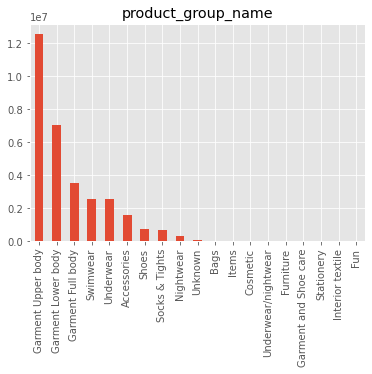

In [15]:
c = cols[10]
transactions[c].value_counts().plot(kind='bar')
plt.title(c)

Text(0.5, 1.0, 'graphical_appearance_name')

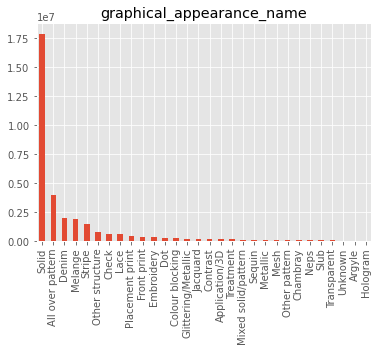

In [16]:
c = cols[11]
transactions[c].value_counts().plot(kind='bar')
plt.title(c)

Text(0.5, 1.0, 'colour_group_name')

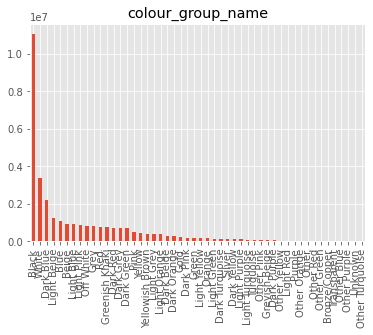

In [17]:
c = cols[12]
transactions[c].value_counts().plot(kind='bar')
plt.title(c)

Text(0.5, 1.0, 'colour_group_name')

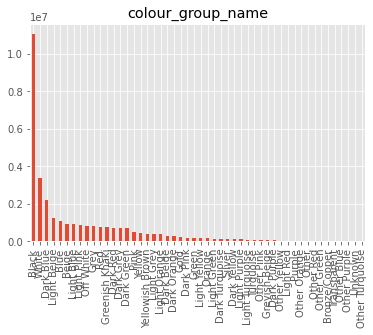

In [18]:
c = cols[12]
transactions[c].value_counts().plot(kind='bar')
plt.title(c)

Text(0.5, 1.0, 'perceived_colour_value_name')

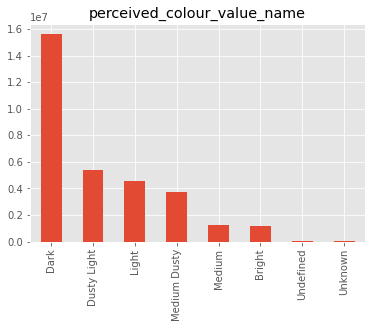

In [19]:
c = cols[13]
transactions[c].value_counts().plot(kind='bar')
plt.title(c)

Text(0.5, 1.0, 'perceived_colour_master_name')

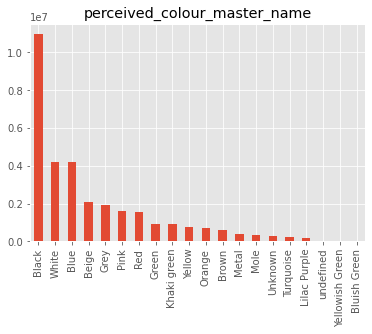

In [20]:
c = cols[14]
transactions[c].value_counts().plot(kind='bar')
plt.title(c)

Text(0.5, 1.0, 'index_name')

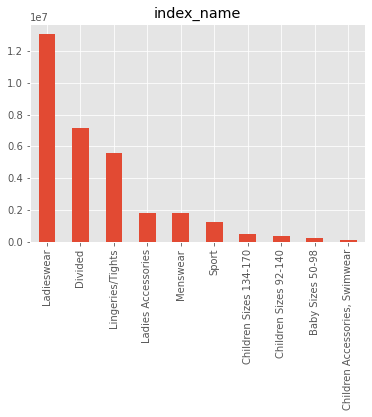

In [21]:
c = cols[16]
transactions[c].value_counts().plot(kind='bar')
plt.title(c)

Text(0.5, 1.0, 'index_group_name')

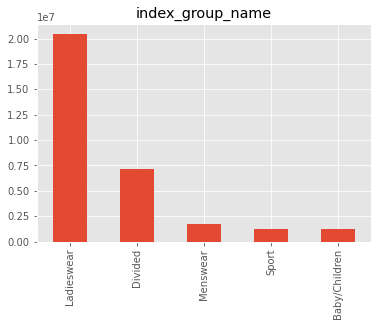

In [22]:
c = cols[17]
transactions[c].value_counts().plot(kind='bar')
plt.title(c)

Text(0.5, 1.0, 'garment_group_name')

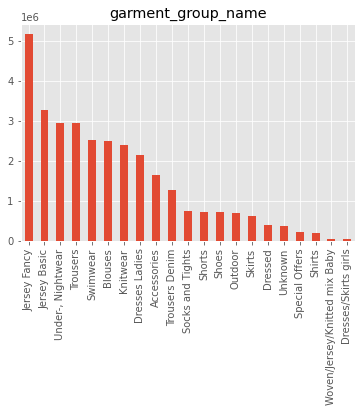

In [24]:
c = cols[19]
transactions[c].value_counts().plot(kind='bar')
plt.title(c)

In [27]:
transactions['1st_buy'] = transactions.groupby('article_id')['t_dat'].transform('min')

In [28]:
transactions['1st_buy_datediff'] = (transactions['t_dat'] - transactions['1st_buy']).dt.days

<AxesSubplot:>

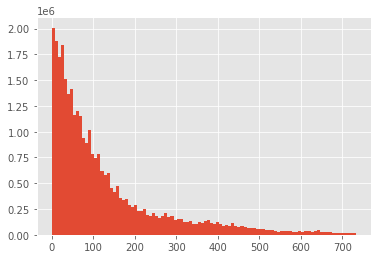

In [31]:
transactions['1st_buy_datediff'].hist(bins=100)

<AxesSubplot:>

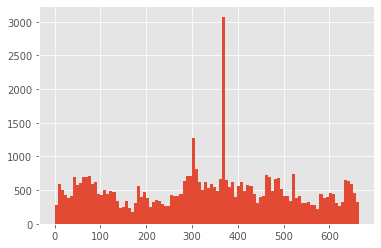

In [39]:
transactions[transactions['article_id']=='0706016001']['1st_buy_datediff'].hist(bins=100)

<AxesSubplot:>

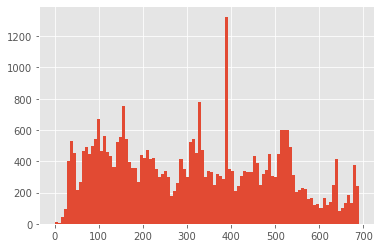

In [40]:
transactions[transactions['article_id']=='0706016002']['1st_buy_datediff'].hist(bins=100)

<AxesSubplot:>

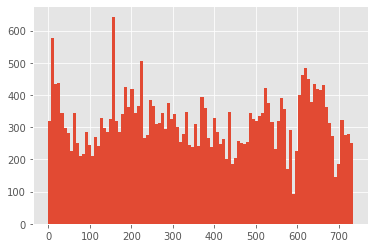

In [41]:
transactions[transactions['article_id']=='0372860001']['1st_buy_datediff'].hist(bins=100)

<AxesSubplot:>

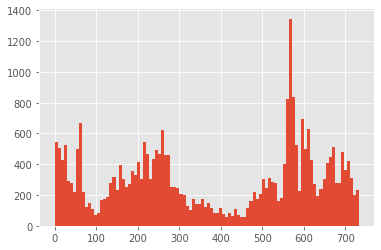

In [42]:
transactions[transactions['article_id']=='0610776002']['1st_buy_datediff'].hist(bins=100)

<AxesSubplot:>

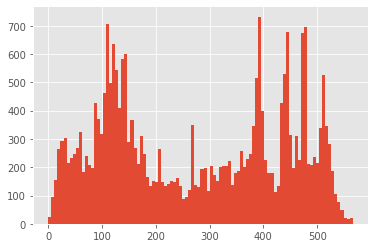

In [43]:
transactions[transactions['article_id']=='0759871002']['1st_buy_datediff'].hist(bins=100)

In [45]:
transactions[transactions['article_id']=='0706016001']['t_dat'].value_counts()

2019-11-29    1303
2019-11-28     718
2019-09-28     645
2019-11-30     490
2019-11-03     218
              ... 
2019-05-20      16
2018-11-28      15
2019-04-21      15
2020-02-12      13
2018-11-27       4
Name: t_dat, Length: 666, dtype: int64

In [46]:
transactions[transactions['article_id']=='0610776002']['t_dat'].value_counts()

2020-04-11    516
2020-04-04    219
2020-04-08    192
2018-11-23    188
2020-04-09    169
             ... 
2019-12-09      3
2019-11-11      3
2019-11-25      3
2019-12-25      2
2019-11-17      2
Name: t_dat, Length: 734, dtype: int64

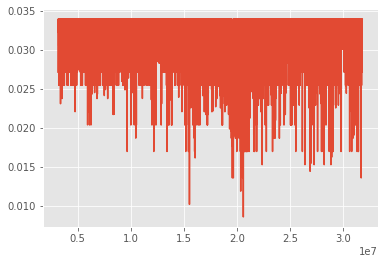

In [48]:
plt.plot(transactions[transactions['article_id']=='0706016001']['price'])

In [54]:
df = transactions[(transactions['article_id']=='0706016001')&(transactions['t_dat']=='2019-11-29')]

In [61]:
df['postal_code'].value_counts()

2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c    56
f061fdf1f126b3ed5a48064ae561d8980c12fb6e5f8b516520a564cfca455262     6
e76c9e5b0718ee36640eb5456b4ca3a0ac0c749312ef9bbd961ae2b3e02a060f     5
05362dd964b26a34659aacd330e1abc4a8f7afdc06b6337de9bcf578d9998fe2     4
a9db44676ff9d30b1370067dadf84d7e8023eb92ac5453cd7d159514bd5dda33     4
                                                                    ..
c29c721844b4edbd1c868fbf6de33e73891bb5189e0a9b2287c47911ff5a45b2     1
9c5f2ee0afdcf39a825358c39b5d208e57ff182ac2568f4edd15be8b70b9029a     1
a5448c33fc0e294ce103c15a7f247efe2b7d9d3ece439671eb24b36a513d05fd     1
c0827072735ede2ef9600288f0f1b547bdef1e3a08ff08e38649b58f6e36a1ef     1
19eeeec09e6be90551ff341246f3c4abaa90df3a3bce88fd0a49a2234e8d7fd3     1
Name: postal_code, Length: 1018, dtype: int64

In [66]:
df[df['postal_code']=='f061fdf1f126b3ed5a48064ae561d8980c12fb6e5f8b516520a564cfca455262'][['price', 'age', 'FN', 'Active', 'club_member_status']]

,price,age,FN,Active,club_member_status
19515045,0.027102,46.0,NaN,NaN,ACTIVE
19515046,0.027102,46.0,NaN,NaN,ACTIVE
19515047,0.027102,46.0,NaN,NaN,ACTIVE
19515048,0.027102,46.0,NaN,NaN,ACTIVE
19515049,0.027102,46.0,NaN,NaN,ACTIVE
19515050,0.027102,46.0,NaN,NaN,ACTIVE


In [77]:
df = transactions[(transactions['article_id']=='0706016001')&(transactions['t_dat']=='2019-11-29')]
df2  = df[df['postal_code']=='2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c'][['price', 'age', 'FN', 'Active', 'club_member_status']]
df2['price_rate'] = df['price'] / df2['price'].mode().values[0]
df2['price_rate'].value_counts()

1.000000    43
0.899937    12
0.749844     1
Name: price_rate, dtype: int64

<AxesSubplot:>

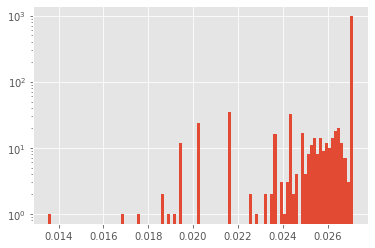

In [76]:
transactions[(transactions['article_id']=='0706016001')&(transactions['t_dat']=='2019-11-29')]['price'].hist(bins=100, log=True)

In [38]:
transactions['article_id'].value_counts()

0706016001    50287
0706016002    35043
0372860001    31718
0610776002    30199
0759871002    26329
              ...  
0520736002        1
0619777003        1
0586904003        1
0512385003        1
0533261032        1
Name: article_id, Length: 104547, dtype: int64

In [90]:
df = transactions.groupby(['article_id', 't_dat'])['price'].mean().reset_index()

<AxesSubplot:>

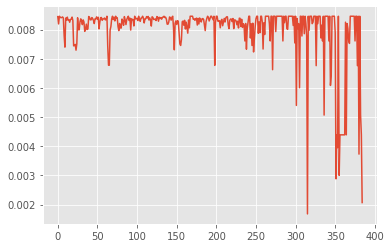

In [92]:
df[df['article_id']=='0108775015']['price'].plot()

<AxesSubplot:>

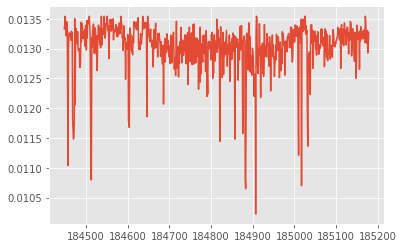

In [94]:
df[df['article_id']=='0372860001']['price'].plot()

<AxesSubplot:>

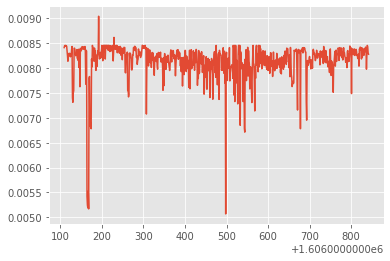

In [95]:
df[df['article_id']=='0610776002']['price'].plot()

In [ ]:
df[df['article_id']=='0706016001']['price'].plot()